In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv('dataset.csv')
df_strings = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [27]:
# Calculate BMI and drop height, weight columns
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

df.drop('Height', axis=1, inplace=True)
df.drop('Weight', axis=1, inplace=True)

In [28]:
df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [29]:

df_encoded = pd.get_dummies(df, columns=df_strings)
df_encoded = df_encoded

In [30]:
df_encoded

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,BMI,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight,24.386526,True,False,...,False,False,False,False,True,False,False,False,True,False
1,21.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight,24.238227,True,False,...,True,False,False,True,False,False,False,False,True,False
2,23.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight,23.765432,False,True,...,False,False,True,False,False,False,False,False,True,False
3,27.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I,26.851852,False,True,...,False,False,True,False,False,False,False,False,False,True
4,22.000000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II,28.342381,False,True,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III,44.901475,True,False,...,False,False,False,True,False,False,False,False,True,False
2107,21.982942,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III,43.741923,True,False,...,False,False,False,True,False,False,False,False,True,False
2108,22.524036,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III,43.543817,True,False,...,False,False,False,True,False,False,False,False,True,False
2109,24.361936,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III,44.071535,True,False,...,False,False,False,True,False,False,False,False,True,False


In [33]:
le = LabelEncoder()
for string in df_strings:
    df[string] = le.fit_transform(df[string])

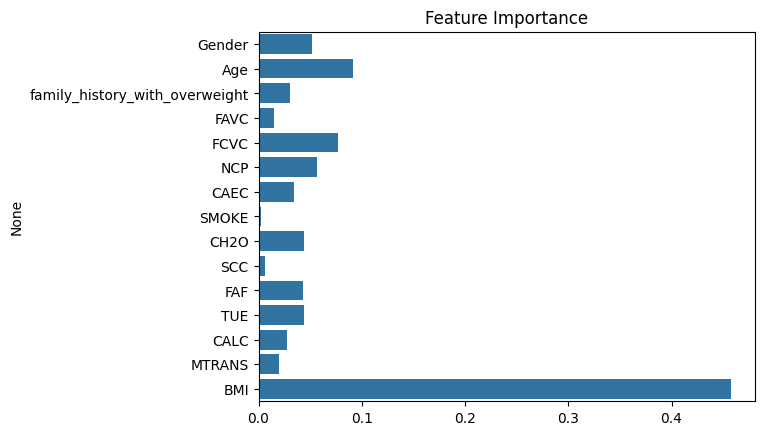

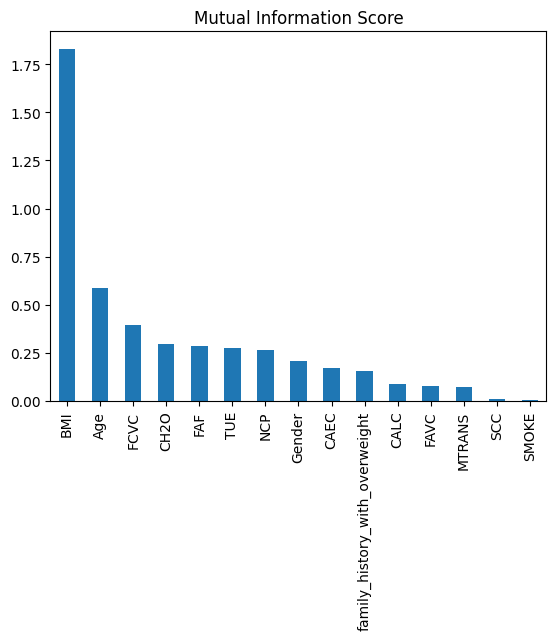

In [34]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Random Forest for feature importance
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

# Plot feature importances
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importance')
plt.show()

# Mutual Information
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns)
mi_series.sort_values(ascending=False).plot.bar()
plt.title('Mutual Information Score')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train model on random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

Accuracy: 0.97


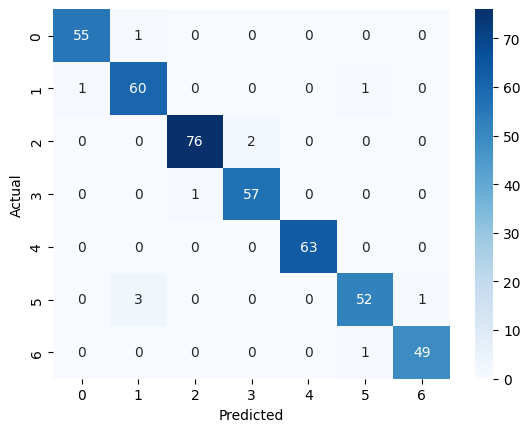

In [25]:
# See accuracy and confusion matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()